In [1]:
# Required packages
# !pip install git+https://github.com/mkrphys/ipython-tikzmagic.git
%load_ext tikzmagic

#pip install jupyterlab_markup
# or
#conda install -c conda-forge jupyterlab-markup

from IPython.display import display, Latex

# !conda install sympy
from sympy import Matrix, latex, print_latex, init_printing
init_printing()

# Estimation Theory

or 

# Remote Sensing Data

## Multi-Dimensional Data

### Intensity Transformation Operators for Intensity Images

Assume we have given a two-dimensional image 
$$
\left\{ x_{i,j} \right\}_{\substack{0 \leq i \leq M \\ 0 \leq j \leq N}} = f \in \left\{0, \ldots, 2^{B-1} \right\}^{M \times N} \subset \mathbb{N}^{M \times N}
$$
of integer-valued pixels $x_{i,j}$.

#### Log Transform

Mathematically, the _log transforma_ of an input value $x$ can be expressed as $$x^\prime = f_\text{log}(x) = c_1 \cdot \log(1 + x) \quad.$$ 
The scaling constant $c_1 = \frac{2^B-1}{\log\left(2^B\right)}$ maintains the original dynamic range.

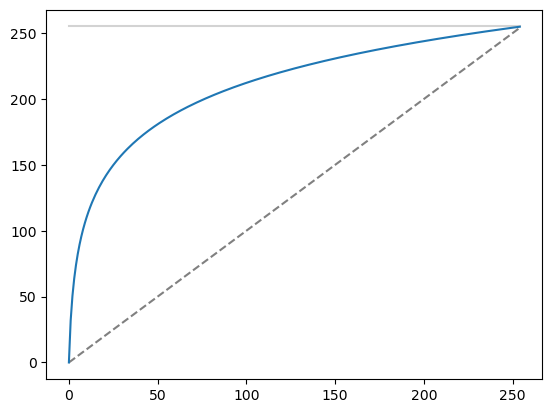

In [15]:
import numpy as np

def logtransform(x, c=255/(np.log(1+255))):
    return c * np.log(1+x)

B = 8
x = np.arange(0, 2**B-1)
x_ = logtransform(x)

import matplotlib.pyplot as plt
plt.plot(x, x, '--', c='gray')
plt.plot(x, np.ones_like(x)*(2**B-1), c='lightgray')
plt.plot(x, x_)

#### Gamma-Transform or Power-Law Transform

The _Gamma transform_ 
$$x^\prime = f_\text{gamma}(x) = \left(2^B-1\right) \cdot \left(\frac{x}{2^B-1}\right)^\gamma$$ 
of an input value $x$ is used to brighten or darken an entire image.

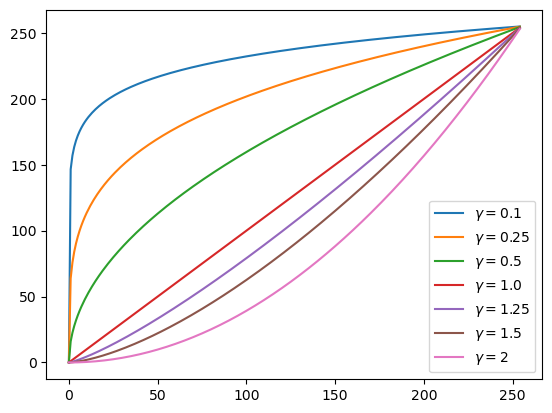

In [38]:
def gammatransform(x, gamma, c=1/255):
    return  (x * c)**gamma / c

x = np.arange(0, 2**B-1)

for gamma in [.1, .25, .5, 1.0, 1.25, 1.5, 2]:
    x_ = gammatransform(x, gamma)
    plt.plot(x, x_, label=f'$\gamma={gamma}$')
plt.legend()

### Image Registration using Mutual Information

The _mutual information_
$$
\begin{align*}
  I(X, Y) &= D_\text{KL}\left(p_{(X,Y)} \Vert p_{X} \cdot p_{Y} \right) \\
          &= \sum_{x,y} p(x,y) \cdot \log \left( \frac{p(x,y)}{p(x) \cdot p(y)} \right) 
\end{align*}
$$
of two random variables $X, Y$ can also calculated as the their _Kullback-Leibler (KL) divergence_ $D_\text{KL}$ between the joint probability distribution and the product of the marginal probabilities for each variable. 

In [205]:
from matplotlib import colors

def MI(X, Y):
    
    if len(X.shape) > 1:
        X=X.ravel()
    if len(Y.shape) > 1:
        Y=Y.ravel()
    
    H_x, _ = np.histogram(X, bins=2**B, density=True)
    H_y, _ = np.histogram(Y, bins=2**B, density=True)
    H_xy   = np.histogram2d(X, Y, bins=2**B, density=True)
    
    fig, ax = plt.subplots(1,2)
    ax[0].plot(H_x, label='$p(x)$')
    ax[0].plot(H_y, label='$p(y)$')
    ax[0].legend()
                           
    ax[1].imshow(H_xy[0]+1e-5, norm=colors.LogNorm())
    ax[1].set_title('$p(x,y)$')
    
    I = 0
    for x, y in zip(X, Y):
        I += H_xy[0][x, y] * np.log(H_xy[0][x, y] / (H_x[x] * H_y[y]))
        
    return I
        

These two images have inverted intensities and are shifted towards earch other along the horizontal axis.

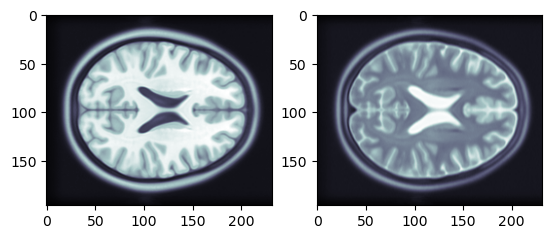

In [215]:
from matplotlib import image
img1 = (255.*image.imread('data/mri_t1.png')).astype(np.uint8)
img2 = (255.*image.imread('data/mri_t2.png')).astype(np.uint8)

_, ax = plt.subplots(1,2)
ax[0].imshow(img1, cmap='bone')
ax[1].imshow(img2, cmap='bone')

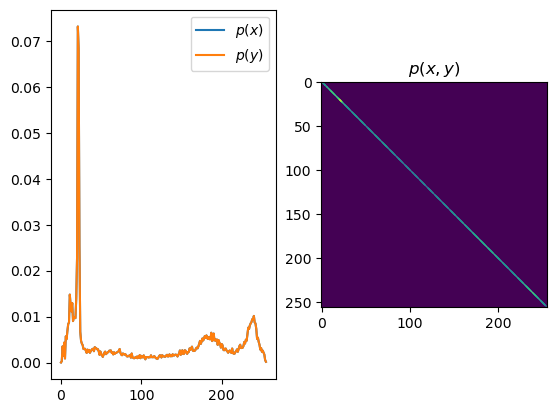

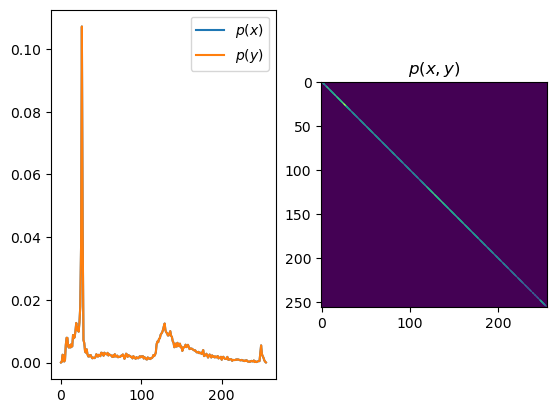

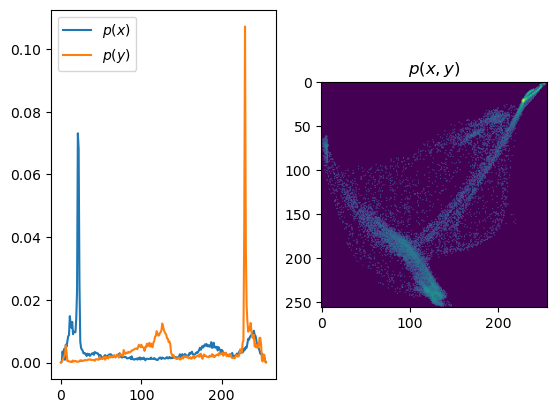

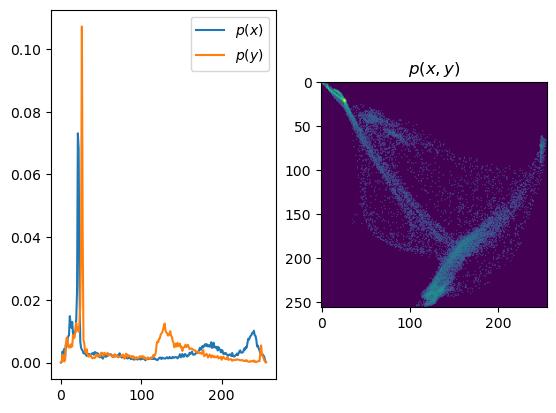

In [217]:
I_x = MI(img1, img1)
I_y = MI(img2, img2)
I_xy_= MI(img1, 255-img2)
I_xy= MI(img1, img2)

In [220]:
display(Latex(f'$I(X, X) = {I_x:.3f}$'))
display(Latex(f'$I(Y, Y) = {I_y:.3f}$'))
display(Latex(f'$I(X, Y^\prime) = {I_xy_:.3f}$'))
display(Latex(f'$I(X, Y) = {I_xy:.3f}$'))

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>